<a href="https://colab.research.google.com/github/dotorimuk1112/DL_self_taught/blob/main/Self_taught_F(Visualization%20of%20CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망 활용

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # 픽셀당 255개 값으로 분할
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42) # train, test set 분할

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential() # 객체 생성
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1))) # 모델 정의(필터: 32개 / 커널 크기: 3, 3 / 활성화함수: rely / 세임패딩)

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
from threading import active_count
model.add(keras.layers.Flatten()) #10개의 출력층에 전달하기 위해 데이터 일렬로 펼침
model.add(keras.layers.Dense(100, activation='relu')) # 100개의 뉴런을 가진 은닉층 추가
model.add(keras.layers.Dropout(0.4)) #40% 드롭아웃 시행(40% 뉴런 끄고 연산) - 은닉층의 과대적합 방지
model.add(keras.layers.Dense(10,activation='softmax')) # 출력층 추가

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [ ]:
keras.utils.plot_model(model)

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [10]:
#@title 모델 컴파일과 훈련

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                 save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 15s 4ms/step - loss: 0.5287 - accuracy: 0.8114 - val_loss: 0.3329 - val_accuracy: 0.8785
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3453 - accuracy: 0.8781 - val_loss: 0.2762 - val_accuracy: 0.8976
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2929 - accuracy: 0.8956 - val_loss: 0.2501 - val_accuracy: 0.9099
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2594 - accuracy: 0.9058 - val_loss: 0.2427 - val_accuracy: 0.9117
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2350 - accuracy: 0.9143 - val_loss: 0.2254 - val_accuracy: 0.9177
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2183 - accuracy: 0.9210 - val_loss: 0.2169 - val_accuracy: 0.9197
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1994 - accuracy: 0.9262 - val_loss: 0.2165 - val_accuracy

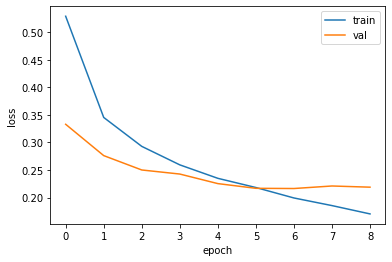

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2165 - accuracy: 0.9192


[0.21652421355247498, 0.9191666841506958]

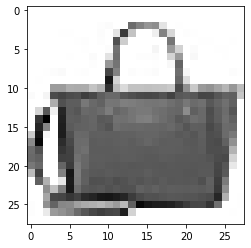

In [14]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [15]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 129ms/step
[[2.0462311e-15 5.9902455e-19 3.0831880e-17 2.4101563e-16 1.7290960e-17
  3.5500191e-14 6.8915855e-16 1.1696900e-14 1.0000000e+00 3.1100767e-15]]


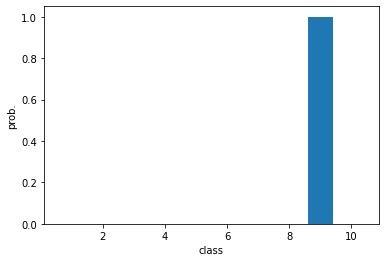

In [16]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [17]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [18]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [19]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [20]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2348 - accuracy: 0.9179


[0.23476089537143707, 0.917900025844574]

# 합성곱 신경망 시각화

In [21]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [22]:
model.layers

In [23]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [25]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.031021042 0.2583339


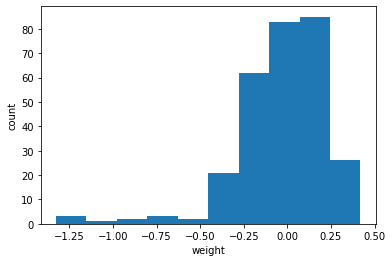

In [26]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

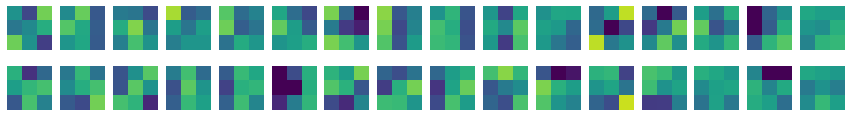

In [28]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [29]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same', input_shape=(28, 28, 1)))

In [30]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [35]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0011418534 0.08134455


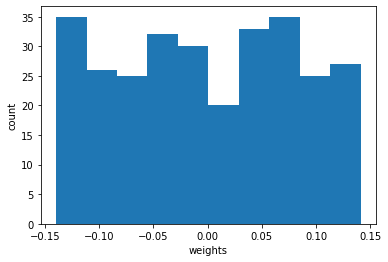

In [37]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

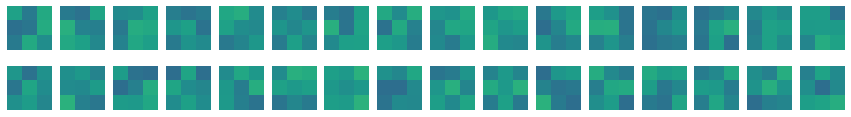

In [38]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [39]:
#@title keras 함수형 API

In [43]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [51]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [52]:
conv_acti = keras.Model(model.input, model.layers[0].output)

In [53]:
#@title 특성 맵 시각화

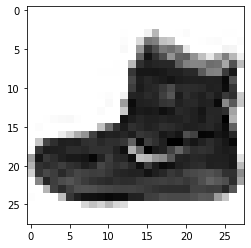

In [56]:
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [57]:
inputs = train_input[0:1].reshape(-1, 28 ,28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 57ms/step


In [58]:
print(feature_maps.shape)

(1, 28, 28, 32)


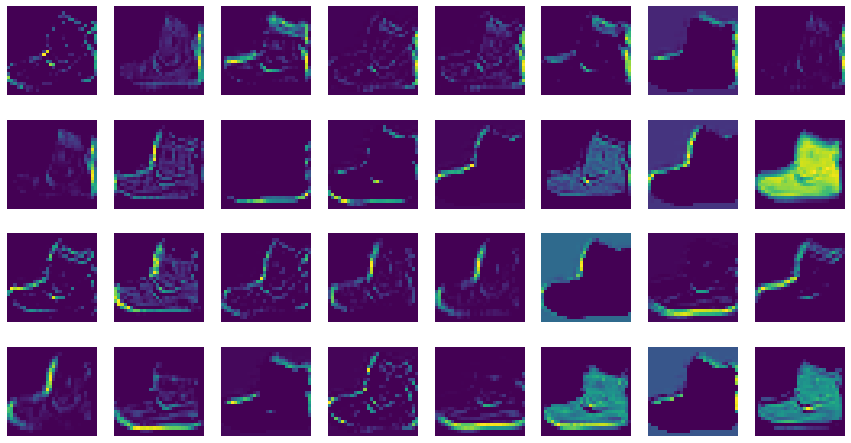

In [59]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [60]:
conv2_acti = keras.Model(model.input, model.layers[2].output) # 2번째 합성곱 층이 만든 특성맵

In [63]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 67ms/step


In [64]:
print(feature_maps.shape)

(1, 14, 14, 64)


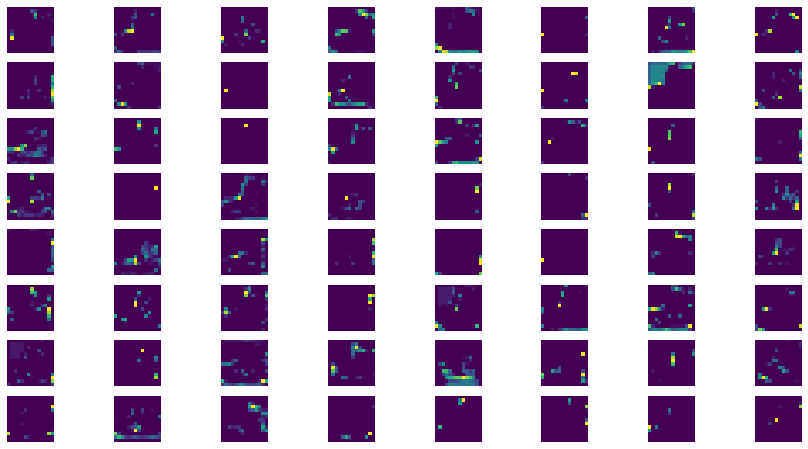

In [65]:
fig, axs = plt.subplots(8, 8, figsize=(15, 8))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()